# 03: Exploratory Data Analysis

## Objective:
In this notebook, we will begin the **quantitative analysis** of defense spending dynamics (1993–2023) with a focus on the **United States** and its **rivals** (China, Russia). We aim to:
1. **Explore the data** using summary statistics, trends, and correlation analysis.
2. **Test for stationarity** and understand the time series structure of U.S. defense spending.
3. **Engineer features** that capture the influence of rival powers' military growth on the U.S. defense budget.

### Descriptive Statistics

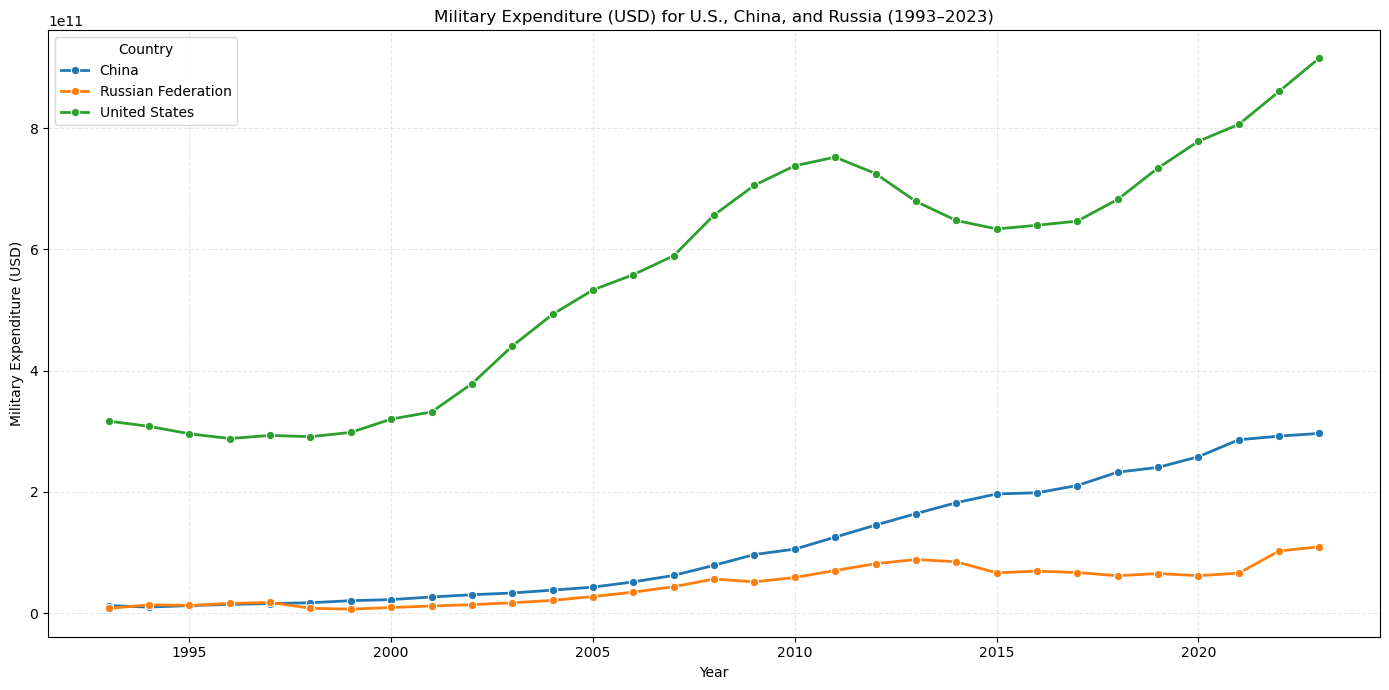

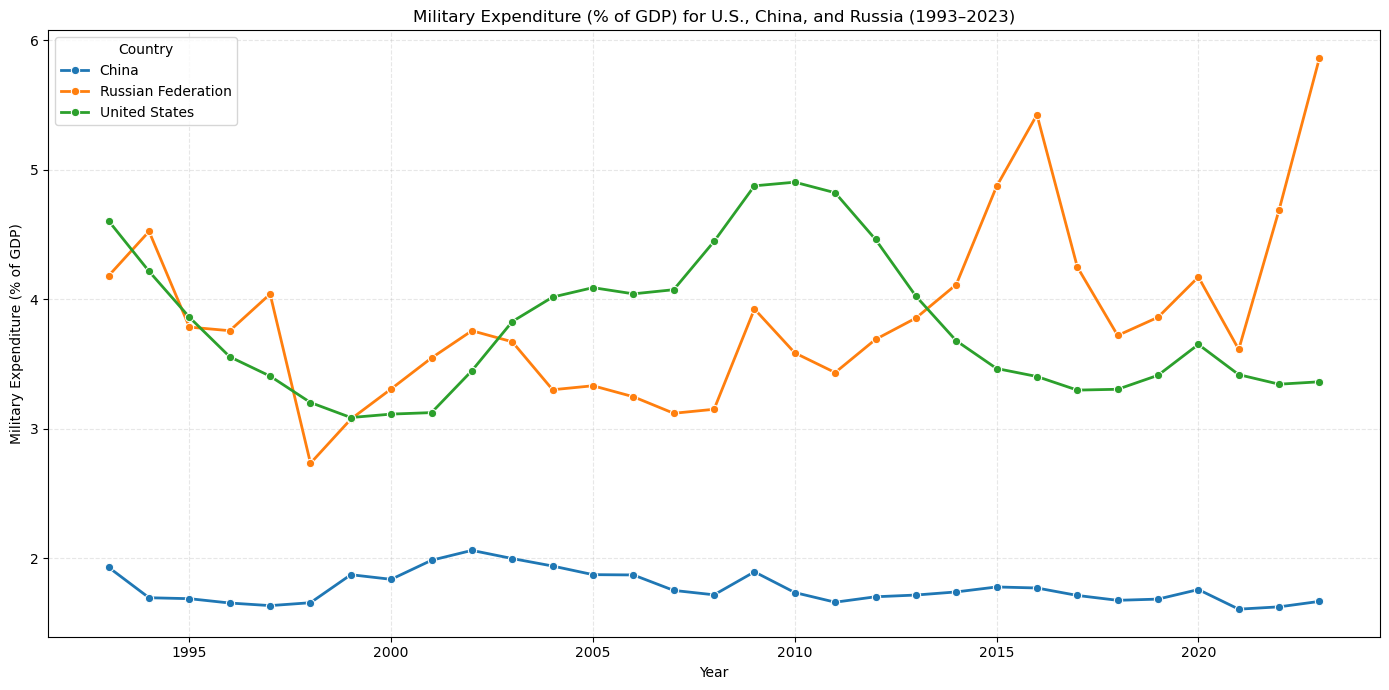

mil_usd                                            \
                     count          mean           std           min   
country                                                                
China                 31.0  1.134467e+11  9.911073e+10  9.867120e+09   
Russian Federation    31.0  4.580913e+10  3.117074e+10  6.469035e+09   
United States         31.0  5.593447e+11  1.983504e+11  2.879607e+11   

                                                                            \
                             25%           50%           75%           max   
country                                                                      
China               2.439930e+10  7.884080e+10  1.975386e+11  2.964386e+11   
Russian Federation  1.488508e+10  5.153212e+10  6.666743e+10  1.094544e+11   
United States       3.259460e+11  6.338296e+11  7.155610e+11  9.160147e+11   

                   mil_gdp_share                                          \
                           count      mean       std       min       25%   
country                                                                    
China                       31.0  1.769162  0.122283  1.605260  1.678245   
Russian Federation          31.0  3.857417  0.678728  2.732649  3.382141   
United States               31.0  3.791147  0.549368  3.085677  3.382219   

                                                  
                         50%       75%       max  
country                                           
China               1.733520  1.870529  2.059365  
Russian Federation  3.756277  4.142236  5.864189  
United States       3.650514  4.081291  4.904023

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("combined_1991_2023_long.csv")

# Filter the dataset to include only relevant countries (USA, China, Russia)
countries_of_interest = ["United States", "China", "Russian Federation"]
df_relevant = df[df["country"].isin(countries_of_interest)]

# 1. Descriptive statistics for U.S., China, and Russia (military spending)
desc_stats = df_relevant.groupby("country")[["mil_usd", "mil_gdp_share"]].describe()

# 2. Calculate the year-on-year growth rate of U.S. military spending (in USD)
df_us = df[df["country"] == "United States"].copy()
df_us["usd_growth_rate"] = df_us["mil_usd"].pct_change() * 100  # percentage change

# 3. Plot the trends of U.S. spending, China, and Russia (both USD and GDP share)

# Plot military expenditure (USD) for USA, China, and Russia
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_relevant, x="year", y="mil_usd", hue="country", marker="o", lw=2)
plt.title("Military Expenditure (USD) for U.S., China, and Russia (1993–2023)")
plt.ylabel("Military Expenditure (USD)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Country", loc="upper left")
plt.tight_layout()
plt.show()

# Plot military expenditure (% of GDP) for USA, China, and Russia
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_relevant, x="year", y="mil_gdp_share", hue="country", marker="o", lw=2)
plt.title("Military Expenditure (% of GDP) for U.S., China, and Russia (1993–2023)")
plt.ylabel("Military Expenditure (% of GDP)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Country", loc="upper left")
plt.tight_layout()
plt.show()

# Display the descriptive statistics for U.S., China, and Russia
desc_stats

### Visualizing the Raw Time Series and Moving Averages

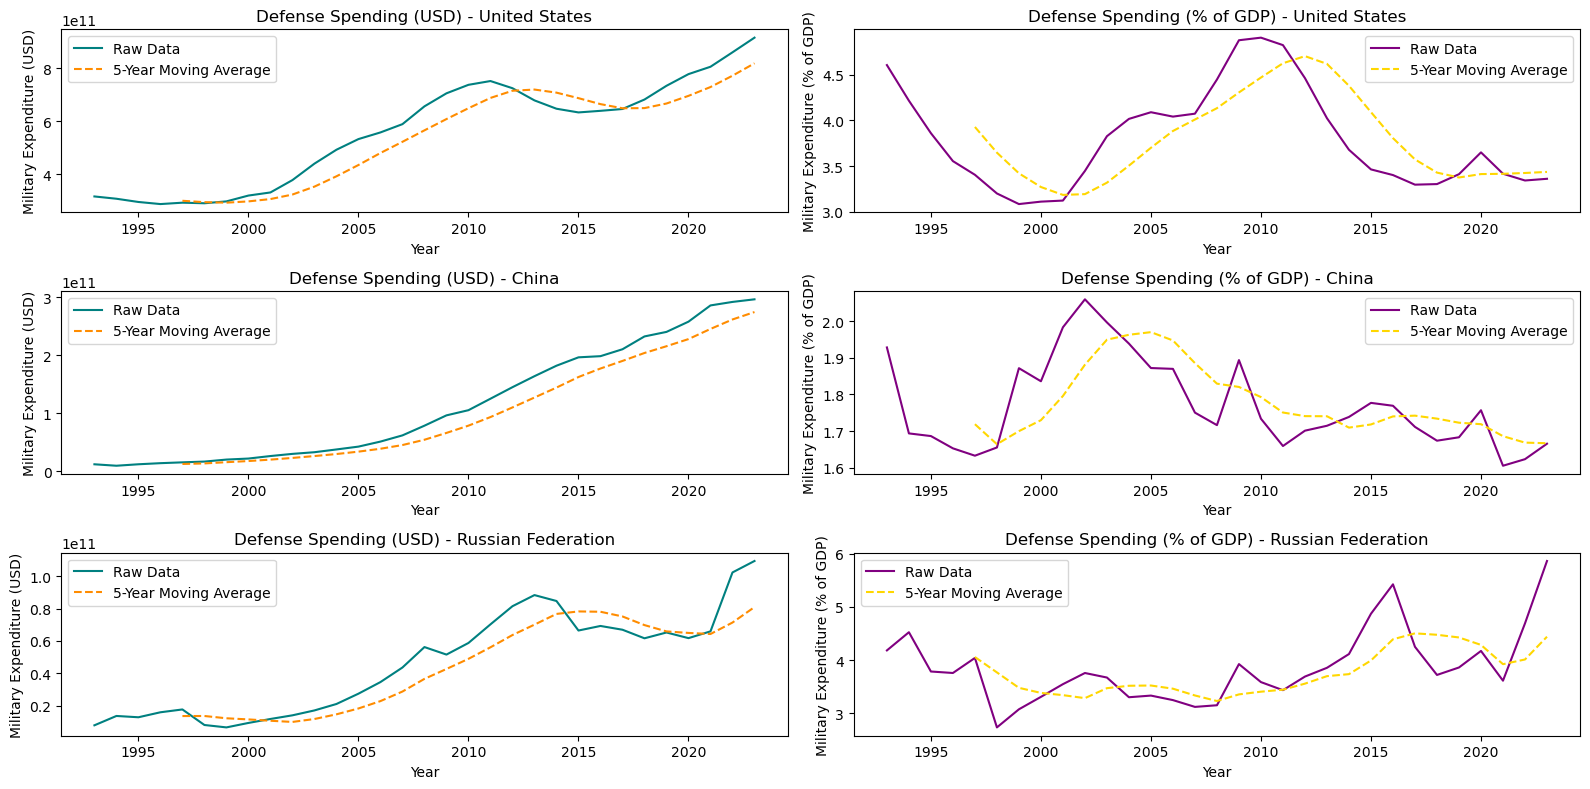

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for the relevant countries (USA, China, Russia)
relevant_countries = ["United States", "China", "Russian Federation"]
df_relevant = df[df["country"].isin(relevant_countries)]

# Set figure size for better visibility
plt.figure(figsize=(16, 8))

# Loop through each country and plot the time series with moving averages
for i, country in enumerate(relevant_countries):
    df_country = df_relevant[df_relevant["country"] == country]
    
    # Plot for USD (raw and moving average)
    plt.subplot(3, 2, i*2 + 1)
    plt.plot(df_country["year"], df_country["mil_usd"], label="Raw Data", color='teal')
    plt.plot(df_country["year"], df_country["mil_usd"].rolling(window=5).mean(), label="5-Year Moving Average", color='darkorange', linestyle='--')
    plt.title(f"Defense Spending (USD) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Military Expenditure (USD)")
    plt.legend()

    # Plot for GDP share (raw and moving average)
    plt.subplot(3, 2, i*2 + 2)
    plt.plot(df_country["year"], df_country["mil_gdp_share"], label="Raw Data", color='purple')
    plt.plot(df_country["year"], df_country["mil_gdp_share"].rolling(window=5).mean(), label="5-Year Moving Average", color='gold', linestyle='--')
    plt.title(f"Defense Spending (% of GDP) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Military Expenditure (% of GDP)")
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### **🇺🇸 United States**:
- **USD Military Expenditure**: There is a **steady increase** in the defense budget from the early 1990s, with significant spikes observed around the **2000s**. The sharp increase after the **9/11 attacks** marks a sustained rise in defense spending.
- **% of GDP**: The **share of GDP** allocated to defense spending fluctuated, with a notable **peak** around the early 2000s, followed by a gradual decline. This reflects the economic shifts alongside defense priorities.

#### **🇨🇳 China**:
- **USD Military Expenditure**: China's defense spending shows **consistent growth** from the early 2000s onwards, particularly in recent years. This indicates China's rising global power and military modernization efforts.
- **% of GDP**: The defense budget as a percentage of GDP has remained relatively **stable**, reflecting China's careful management of defense spending relative to its booming economy.

#### **🇷🇺 Russia**:
- **USD Military Expenditure**: There was a marked increase in defense spending after the **early 2000s**, with a **sharp rise post-2014** following the **Crimean crisis** and the resurgence of Russian geopolitical ambitions.
- **% of GDP**: Russia's **defense spending as a share of GDP** spiked significantly post-2014, indicating the impact of increased military engagement during times of rising tensions and conflict.

---

### **Key Insights**:
- **🇺🇸 United States** remains the highest spender, particularly after 9/11, with a **significant defense budget** in both USD and GDP share.
- **🇨🇳 China's spending** is on the rise, particularly in USD terms, but maintains a **moderate defense share of GDP**.
- **🇷🇺 Russia's defense spending** surged notably post-2014, likely due to the **Ukraine conflict** and increasing global tensions.


### Year-over-Year Growth

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_35330/3404748284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['usd_growth'] = df_relevant.groupby('country')['mil_usd'].pct_change() * 100
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_35330/3404748284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['gdp_growth'] = df_relevant.groupby('country')['mil_gdp_share'].pct_change() * 100


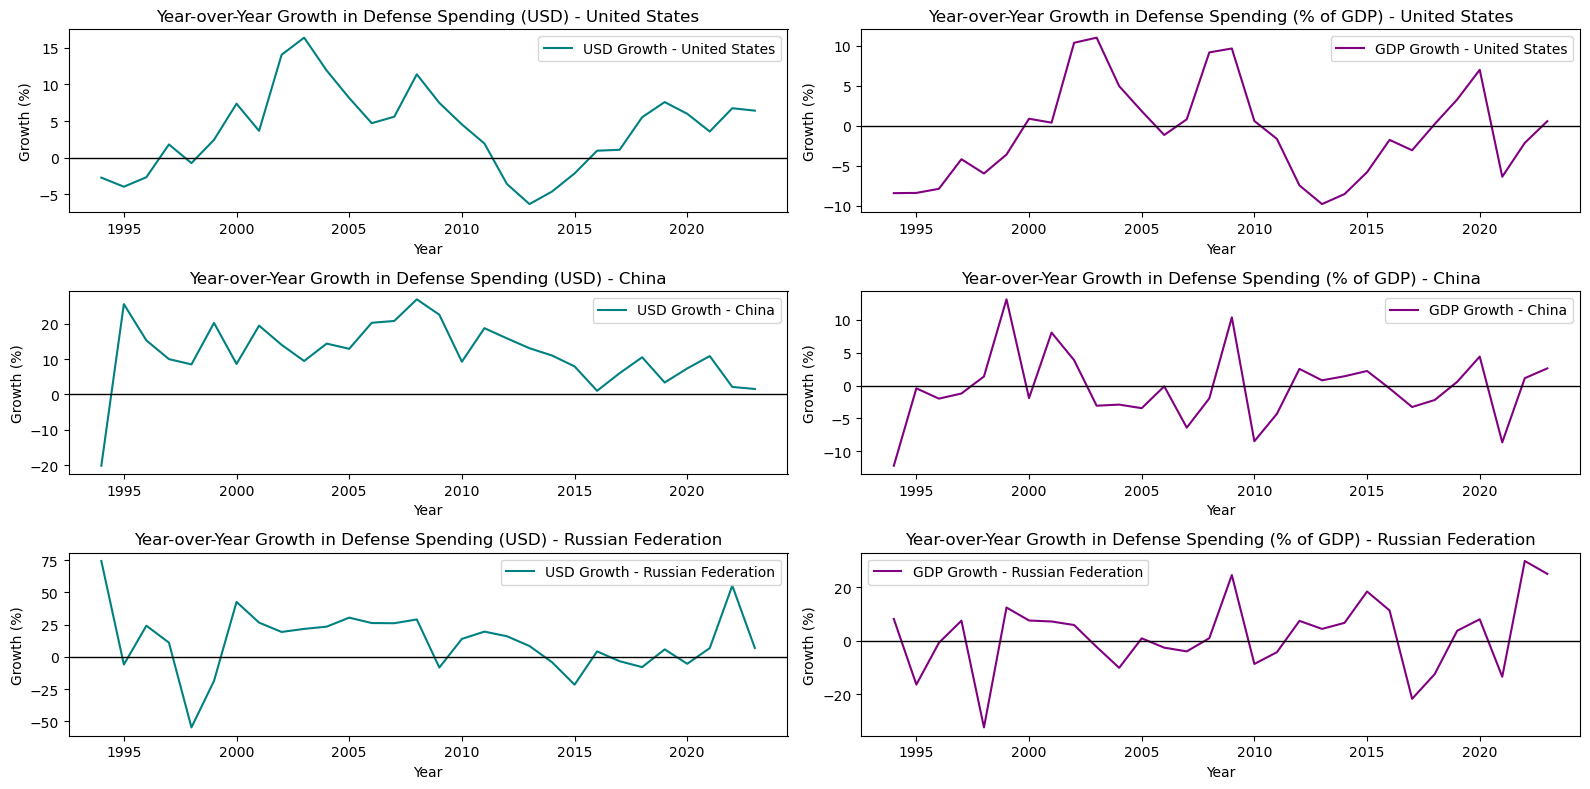

In [64]:
# Calculate Year-over-Year Growth for both USD and GDP share
df_relevant['usd_growth'] = df_relevant.groupby('country')['mil_usd'].pct_change() * 100
df_relevant['gdp_growth'] = df_relevant.groupby('country')['mil_gdp_share'].pct_change() * 100

# Plot Year-over-Year Growth for both USD and GDP share
plt.figure(figsize=(16, 8))

# Loop through each country and plot year-over-year growth
for i, country in enumerate(relevant_countries):
    df_country = df_relevant[df_relevant["country"] == country]
    
    # Plot USD Growth
    plt.subplot(3, 2, i*2 + 1)
    plt.plot(df_country["year"], df_country["usd_growth"], label=f"USD Growth - {country}", color='teal')
    plt.title(f"Year-over-Year Growth in Defense Spending (USD) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Growth (%)")
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()

    # Plot GDP Growth
    plt.subplot(3, 2, i*2 + 2)
    plt.plot(df_country["year"], df_country["gdp_growth"], label=f"GDP Growth - {country}", color='purple')
    plt.title(f"Year-over-Year Growth in Defense Spending (% of GDP) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Growth (%)")
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### **Year-over-Year Growth Insights**

#### **🇺🇸 United States**:
- **USD Growth**: The defense spending in **USD** shows sharp fluctuations, especially from **2000-2010** due to major military operations in **Iraq and Afghanistan**. The growth is most pronounced during this period.
- **% of GDP Growth**: The defense spending as a percentage of GDP also fluctuates significantly, with sharp increases during the **early 2000s** due to heightened defense activities, and a decline post-2010, reflecting the withdrawal of U.S. forces from major conflicts and a push for fiscal consolidation.

#### **🇨🇳 China**:
- **USD Growth**: China's defense expenditure in **USD** shows a consistent increase, particularly after the early **2000s**. This aligns with China's growing economic and military power, especially following its accession to the **World Trade Organization (WTO)** and subsequent rise as a global economic power.
- **% of GDP Growth**: The growth rate for defense spending as a percentage of GDP remains relatively stable, showing China's **balanced approach** to expanding military expenditure while maintaining robust economic growth.

#### **🇷🇺 Russian Federation**:
- **USD Growth**: Russia’s defense spending saw significant growth in the **mid-2000s**. However, a **sharp drop** occurred after **2014**, likely due to the geopolitical tensions surrounding the **Crimean crisis** and the resulting international sanctions.
- **% of GDP Growth**: The defense spending as a percentage of GDP shows large fluctuations, particularly in the years following **2014** with a significant **spike** as Russia increased military expenditure amid the geopolitical tensions and conflicts in **Ukraine**.

---

### **Key Takeaways**:
- The **United States** experienced **sharp spikes** in defense spending during periods of **major military engagements** (2000-2010), while subsequent years show **more restrained growth**.
- **China's defense spending** has grown steadily, with a focus on **modernization and economic expansion** while maintaining a **moderate share of GDP** for defense.
- **Russia’s defense spending** shows **fluctuations** in response to **geopolitical crises**, with a notable spike after 2014, likely due to the **Crimean conflict** and subsequent international isolation.


### Volatility Analysis

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_35330/3150309311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['usd_volatility'] = df_relevant.groupby('country')['mil_usd'].rolling(window=5).std().reset_index(0, drop=True)
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_35330/3150309311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['gdp_volatility'] = df_relevant.groupby('country')['mil_gdp_share'].rolling(window=5).std().reset_index(0, drop=True)


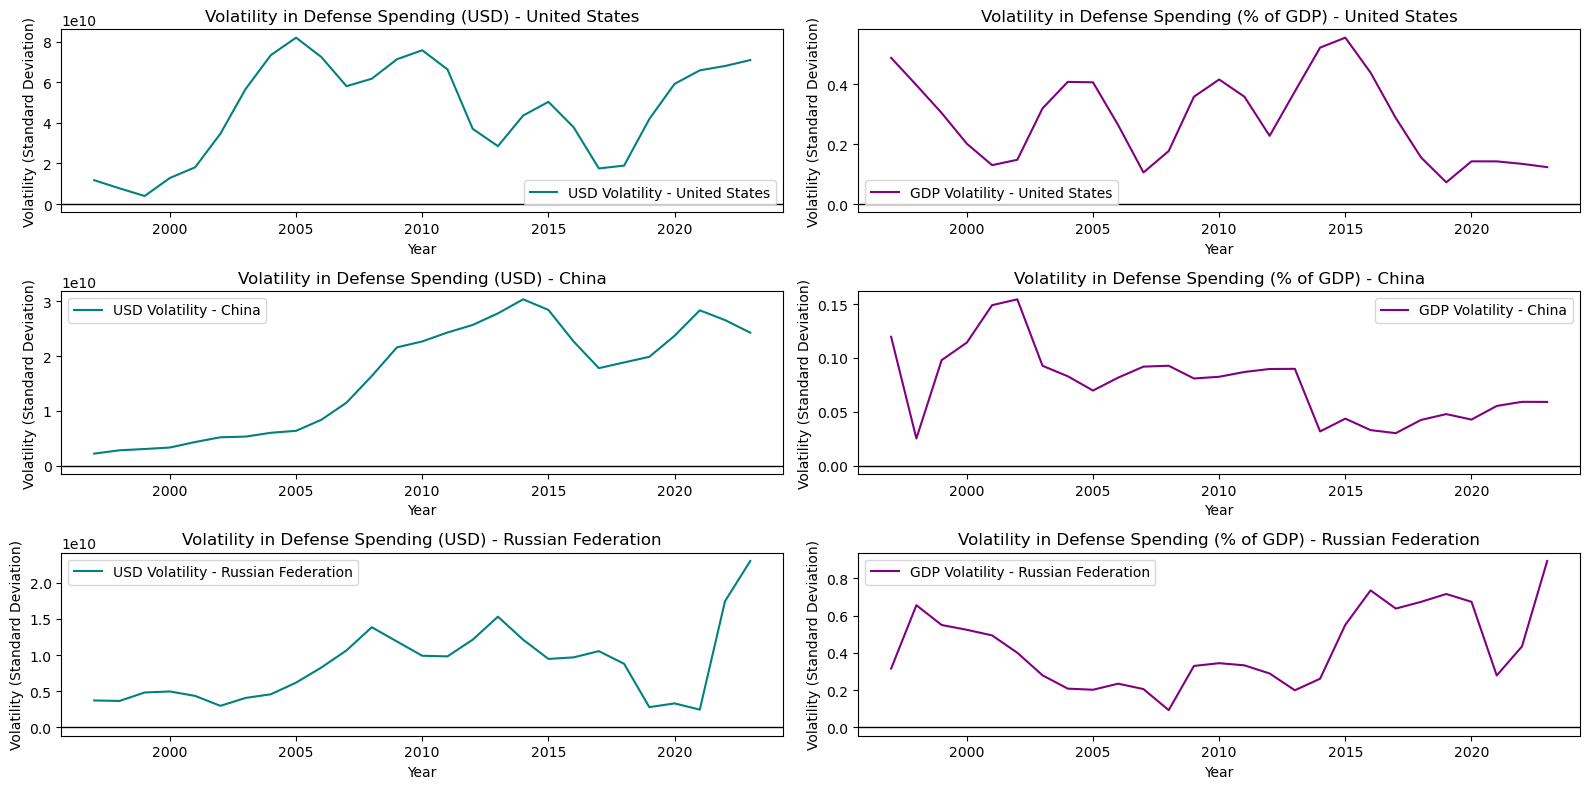

In [65]:
# Calculate rolling standard deviation (volatility) for both USD and GDP share
df_relevant['usd_volatility'] = df_relevant.groupby('country')['mil_usd'].rolling(window=5).std().reset_index(0, drop=True)
df_relevant['gdp_volatility'] = df_relevant.groupby('country')['mil_gdp_share'].rolling(window=5).std().reset_index(0, drop=True)

# Plot the Volatility (Rolling Standard Deviation) for both USD and GDP share
plt.figure(figsize=(16, 8))

# Loop through each country and plot volatility
for i, country in enumerate(relevant_countries):
    df_country = df_relevant[df_relevant["country"] == country]
    
    # Plot USD Volatility
    plt.subplot(3, 2, i*2 + 1)
    plt.plot(df_country["year"], df_country["usd_volatility"], label=f"USD Volatility - {country}", color='teal')
    plt.title(f"Volatility in Defense Spending (USD) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()

    # Plot GDP Volatility
    plt.subplot(3, 2, i*2 + 2)
    plt.plot(df_country["year"], df_country["gdp_volatility"], label=f"GDP Volatility - {country}", color='purple')
    plt.title(f"Volatility in Defense Spending (% of GDP) - {country}")
    plt.xlabel("Year")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

These volatility plots clearly illustrate the fluctuations in defense spending for the United States, China, and Russia. Here's an interpretation of the patterns observed:

1. **United States**:
   - **USD Volatility**: The volatility in USD military expenditure exhibits fluctuations, peaking between the late 2000s and early 2010s, reflecting the high spending during the "War on Terror" and the wars in Iraq and Afghanistan.
   - **GDP Volatility**: The volatility for the U.S. as a percentage of GDP appears more stable, with periodic spikes around major military engagements such as the Gulf War (1991) and 9/11 (2001).
  
2. **China**:
   - **USD Volatility**: China's military expenditure in USD shows gradual increases, with volatility spiking in the mid-2010s. This is likely linked to China's ongoing military modernization efforts, rising defense budgets, and increasing global presence.
   - **GDP Volatility**: China's GDP-based volatility is much lower, reflecting a more stable relationship between GDP growth and defense spending, with smaller fluctuations.

3. **Russian Federation**:
   - **USD Volatility**: Russia’s defense spending in USD shows the most marked volatility, especially from 2010 onwards, reflecting periods of rearmament and the military conflicts in Ukraine and Syria, as well as the economic challenges from sanctions and falling oil prices.
   - **GDP Volatility**: The volatility of Russia’s military expenditure as a percentage of GDP also shows noticeable increases during periods of geopolitical tension, especially following the annexation of Crimea (2014) and conflicts in Ukraine.

### Correlation

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_35330/3037567198.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations, y=countries, palette='coolwarm')


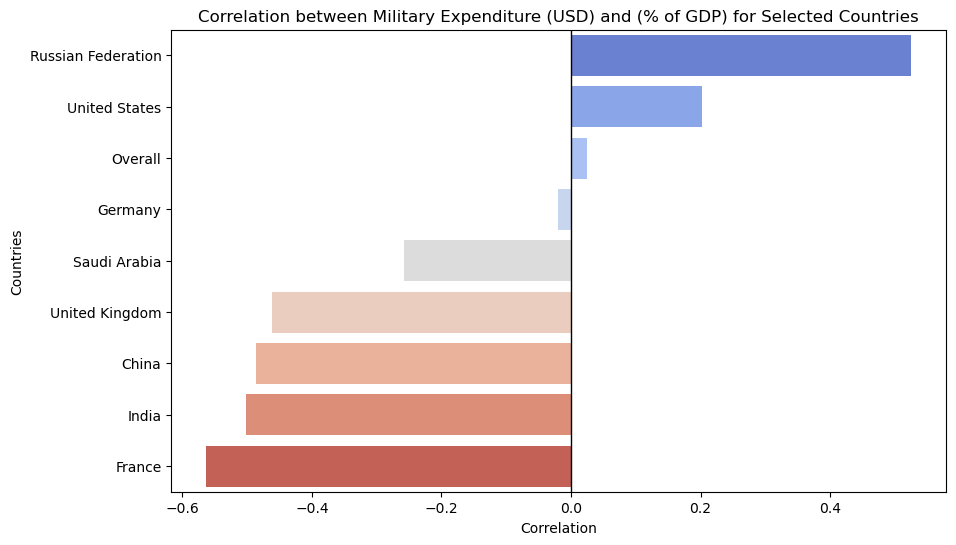

Correlation for United States: 0.20
Correlation for China: -0.49
Correlation for Russian Federation: 0.52
Correlation for India: -0.50
Correlation for Saudi Arabia: -0.26
Correlation for France: -0.56
Correlation for Germany: -0.02
Correlation for United Kingdom: -0.46
Correlation for Overall: 0.02


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the relevant countries
selected_countries = ['United States', 'China', 'Russian Federation', 'India', 'Saudi Arabia', 'France', 'Germany', 'United Kingdom']
df_selected = df[df['country'].isin(selected_countries)]

# Calculate correlation for each country separately
correlation_values = {}
for country in selected_countries:
    df_country = df_selected[df_selected['country'] == country]
    correlation = df_country['mil_usd'].corr(df_country['mil_gdp_share'])
    correlation_values[country] = correlation

# Calculate overall correlation for all selected countries combined
overall_correlation = df_selected['mil_usd'].corr(df_selected['mil_gdp_share'])

# Add overall correlation to the dictionary
correlation_values['Overall'] = overall_correlation

# Sort the correlations in descending order
sorted_countries = sorted(correlation_values.items(), key=lambda x: x[1], reverse=True)

# Extract country names and their corresponding correlations
countries = [item[0] for item in sorted_countries]
correlations = [item[1] for item in sorted_countries]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=countries, palette='coolwarm')
plt.axvline(0, color='black', linewidth=1)
plt.title('Correlation between Military Expenditure (USD) and (% of GDP) for Selected Countries')
plt.xlabel('Correlation')
plt.ylabel('Countries')
plt.show()

# Output the correlation values for each country and the overall correlation
for country, correlation in correlation_values.items():
    print(f"Correlation for {country}: {correlation:.2f}")

1.	**Russian Federation**: The correlation for Russia is 0.52, the highest among the selected countries. This suggests a moderate positive relationship between military expenditure in USD and military expenditure as a percentage of GDP. As Russia’s military spending increases in USD, it appears to correlate positively with its GDP share spent on defense.
2.	**United States**: The correlation for the United States is 0.20, indicating a weak positive relationship. While there is some positive correlation between military spending in USD and as a percentage of GDP, this relationship is not particularly strong. There could be other factors influencing the defense budget beyond GDP share, such as global military involvement.
3.	**China**: China’s correlation is -0.49, indicating a moderate negative relationship. As China’s military expenditure in USD increases, its military spending as a percentage of GDP tends to decrease, reflecting a shift towards increased GDP and less dependency on military spending relative to GDP.
4.	**India**: With a correlation of -0.50, India’s military expenditure behaves similarly to China’s in that higher USD expenditure is inversely related to the military expenditure as a percentage of GDP. This may be due to India’s growing economy over the years.
5.	**Saudi Arabia**: Saudi Arabia has a correlation of -0.26, indicating a weak negative correlation. Despite increasing military expenditure in USD, it seems that Saudi Arabia’s defense spending as a percentage of GDP does not show a strong relationship with the increase in USD expenditure.
6.	**France**: The correlation for France is -0.56, the strongest negative correlation among the selected countries. This suggests that as France’s military expenditure increases in USD, its relative expenditure as a percentage of GDP decreases, likely reflecting a growing economy alongside increased defense budgets.
7.	**Germany**: Germany’s correlation is -0.02, which is almost zero, indicating no significant relationship between military spending in USD and as a percentage of GDP. This could be due to Germany’s stable economy, with defense spending largely unaffected by changes in GDP.
8.	**United Kingdom**: With a correlation of -0.46, the United Kingdom shows a moderate negative relationship, similar to France and China. As military spending in USD rises, the UK’s defense spending as a percentage of GDP tends to fall.
9.	**Overall Correlation**: The overall correlation of 0.02 is very close to zero, meaning that across all the countries combined, there is no significant correlation between military expenditure in USD and military expenditure as a percentage of GDP. This could be due to the varied economic and political conditions in the selected countries.

**Key Insights**:

	• Strong Positive Correlation: The Russian Federation shows a moderate positive correlation, indicating that its defense budget tends to grow with both USD expenditures and as a share of GDP.
    
	• Weak or Negative Correlation: Countries like France, China, and India show a negative relationship, where higher USD spending corresponds with lower defense spending as a percentage of GDP. This could suggest that these countries’ economies are growing faster than their defense budgets.
    
	• No Clear Trend: Germany and the overall data do not show significant correlations, highlighting that defense budgets in some countries may not be as closely tied to overall GDP growth.

This analysis suggests that there are significant differences between countries in how military spending scales with their economy. Some countries like Russia and the US show a more direct relationship, while others, particularly with stronger economies like China and India, show a weaker or negative relationship.

### Variable correlations

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for U.S., Russia, and China from the df
countries = ['United States', 'Russian Federation', 'China']
df_selected = df[df['country'].isin(countries)]

# Correlation between USD (mil_usd) of the U.S. vs. USD (mil_usd) of Russia and China
usd_corr_usa_russia_china = df_selected.pivot_table(index='year', columns='country', values='mil_usd')
usd_corr_usa_russia_china = usd_corr_usa_russia_china.corr()
print("USD Correlation between U.S., Russia, and China (mil_usd):")
print(usd_corr_usa_russia_china)

# Correlation between USD of the U.S. vs % of GDP (mil_gdp_share) of Russia and China
gdp_corr_usa_russia_china = df_selected.pivot_table(index='year', columns='country', values='mil_gdp_share')
gdp_corr_usa_russia_china = gdp_corr_usa_russia_china.corr()
print("\nUSD vs GDP Correlation between U.S., Russia, and China (USD vs % of GDP):")
print(gdp_corr_usa_russia_china)

# Correlation between % of GDP of U.S. vs % of GDP of Russia and China
gdp_corr_usa_russia_china_pct = df_selected.pivot_table(index='year', columns='country', values='mil_gdp_share')
gdp_corr_usa_russia_china_pct = gdp_corr_usa_russia_china_pct.corr()
print("\nGDP Correlation between U.S., Russia, and China (% of GDP):")
print(gdp_corr_usa_russia_china_pct)

USD Correlation between U.S., Russia, and China (mil_usd):
country                China  Russian Federation  United States
country                                                        
China               1.000000            0.886105       0.874827
Russian Federation  0.886105            1.000000       0.927515
United States       0.874827            0.927515       1.000000

USD vs GDP Correlation between U.S., Russia, and China (USD vs % of GDP):
country                China  Russian Federation  United States
country                                                        
China               1.000000           -0.208264       0.072424
Russian Federation -0.208264            1.000000      -0.165626
United States       0.072424           -0.165626       1.000000

GDP Correlation between U.S., Russia, and China (% of GDP):
country                China  Russian Federation  United States
country                                                        
China               1.000000         

#### 1. **USD Correlation between U.S., Russia, and China (Military Expenditure in USD)**:
   - **United States vs Russia**: The correlation coefficient is **0.93**, indicating a very strong positive relationship between U.S. and Russian defense spending in absolute USD terms.
   - **United States vs China**: The correlation between U.S. and China’s military expenditures is **0.87**, showing a significant positive relationship.
   - **Russia vs China**: The correlation here is **0.89**, signifying a strong positive relationship between Russia and China’s defense budgets in USD terms.

   **Insight**:
   - The U.S., Russia, and China have a **strong positive correlation** in terms of military spending in USD, meaning that when one country increases or decreases its military expenditure, the others tend to follow a similar pattern. This could be driven by **geopolitical dynamics** and the need to maintain military parity in the global arena.

#### 2. **USD vs GDP Correlation (USD vs % of GDP)**:
   - **United States vs Russia**: The correlation is **-0.17**, indicating a **weak and negative** relationship between U.S. and Russian military spending in absolute USD terms and their military expenditure as a percentage of GDP.
   - **United States vs China**: The correlation is **0.07**, which is **weak and close to zero**, indicating no significant relationship.
   - **Russia vs China**: The correlation is **-0.21**, signifying a **slight negative** correlation between Russia and China in terms of military spending USD vs GDP.

   **Insight**:
   - The **weak and negative correlations** suggest that military expenditure in **absolute terms (USD)** does not closely align with the **relative spending (percentage of GDP)** for these countries. The differences in **GDP sizes**, economic conditions, and **military priorities** likely explain these weak correlations. For instance, while the U.S. might spend a larger percentage of GDP due to its **global military presence**, other countries may allocate their spending differently.

#### 3. **GDP Correlation (Military Expenditure as % of GDP)**:
   - **United States vs Russia**: The correlation is **-0.17**, showing a very weak negative relationship.
   - **United States vs China**: The correlation is **0.07**, which is close to zero and indicates no significant relationship.
   - **Russia vs China**: The correlation is **-0.21**, representing a slight negative relationship.

   **Insight**:
   - The **low correlations in terms of GDP percentage** suggest that these countries prioritize military spending differently when adjusting for their respective **economic size**. The **U.S.** may allocate a higher percentage of its GDP to defense, likely due to its global military operations and commitments, while **Russia** and **China** allocate a lower share of their GDP to military expenditures, despite their large defense budgets.

#### Final Takeaways:
- The analysis reveals a **strong correlation in USD terms** between the U.S., Russia, and China, suggesting that the major powers follow similar trends in defense spending in absolute terms. This may reflect a global geopolitical competition or military parity.
- The **weak correlations in terms of GDP percentage** suggest that each country has different strategies when adjusting their military spending to their economic capacity. The **U.S.** tends to allocate a larger share of its GDP to defense compared to **Russia** and **China**, possibly due to its global military commitments.
  
By comparing the military expenditures of these countries, we observe that while they follow similar trends in absolute defense spending, their relative spending in terms of GDP varies significantly based on their economic strategies and national priorities.

### Compare U.S. with the Eastren Block (Iran, Russia, China)

In [68]:
# List of countries for the block (Iran, North Korea, Russia, China)
block_countries = ['Iran, Islamic Rep.', 'Russian Federation', 'China']
df_block = df[df['country'].isin(block_countries + ['United States'])]

# Calculate correlation between USD (mil_usd) for U.S. and the block (USD comparison)
usd_block_corr = df_block.pivot_table(index='year', columns='country', values='mil_usd').corr()

# Calculate correlation between GDP percentage (mil_gdp_share) for U.S. and the block (% of GDP comparison)
gdp_block_corr = df_block.pivot_table(index='year', columns='country', values='mil_gdp_share').corr()

print("USD Correlation between U.S. and the Block (Iran, North Korea, Russia, China):")
print(usd_block_corr)

print("\nGDP Correlation between U.S. and the Block (Iran, North Korea, Russia, China):")
print(gdp_block_corr)

USD Correlation between U.S. and the Block (Iran, North Korea, Russia, China):
country                China  Iran, Islamic Rep.  Russian Federation  \
country                                                                
China               1.000000            0.364957            0.886105   
Iran, Islamic Rep.  0.364957            1.000000            0.607994   
Russian Federation  0.886105            0.607994            1.000000   
United States       0.874827            0.563615            0.927515   

country             United States  
country                            
China                    0.874827  
Iran, Islamic Rep.       0.563615  
Russian Federation       0.927515  
United States            1.000000  

GDP Correlation between U.S. and the Block (Iran, North Korea, Russia, China):
country                China  Iran, Islamic Rep.  Russian Federation  \
country                                                                
China               1.000000            0.191299


#### **USD Correlation (Military Expenditure in USD)**:
- **U.S. vs China**: The correlation between the U.S. and China’s military expenditures in USD is **0.87**, indicating a **strong positive relationship**. Both countries have similar trends in defense spending in absolute terms (USD), likely driven by their **global military competition** and rising defense budgets.
  
- **U.S. vs Iran**: The correlation is **0.56**, showing a **moderate positive relationship**. While Iran’s military expenditure in USD tends to align with that of the U.S., the trend is less pronounced compared to the U.S. and China or U.S. and Russia.
  
- **U.S. vs Russia**: The correlation is **0.93**, the highest among the countries in the block. This suggests a **very strong positive relationship**, likely due to the **historical rivalry** and **military competition** between the U.S. and Russia.

#### **Key Insight (USD)**:
- The **U.S. and Russia** correlation in military expenditure (USD) is the strongest, reflecting their ongoing **military rivalry**.
- The **U.S. and China** also exhibit a strong correlation, which is consistent with the growing geopolitical rivalry between these two nations, especially in terms of **military power**.
- **Iran** has a moderate correlation with the U.S. in USD terms, suggesting that although there is some military spending alignment, it is not as direct as the relationships between the U.S., Russia, and China.

---

#### **GDP Correlation (Military Expenditure as Percentage of GDP)**:
- **U.S. vs China**: The correlation is **0.07**, essentially **zero**, indicating that the **relative military spending** of the U.S. and China (as a percentage of GDP) does not correlate well. This could be due to China’s **rapid economic growth**, where its defense spending as a percentage of GDP has not increased significantly.
  
- **U.S. vs Iran**: The correlation is **0.25**, suggesting a **weak positive relationship**. While there is some slight alignment, it is not a strong correlation, indicating that U.S. and Iran's military spending relative to GDP is not closely tied.

- **U.S. vs Russia**: The correlation is **-0.17**, showing a **weak negative relationship**. As the U.S. adjusts its defense budget relative to GDP, Russia does not follow the same trend. This could reflect different **economic strategies** or **military priorities**.

#### **Key Insight (GDP)**:
- The **weak correlations** between the U.S. and other countries in terms of **GDP-based defense spending** suggest that the spending patterns of these countries are influenced by different **economic conditions** and **military strategies**. The **U.S.** tends to increase its defense spending relative to GDP due to its **global military commitments**, whereas **China** and **Russia** might prioritize other sectors of their economies.


In [69]:
# List of countries for the block (Iran, North Korea, Russia, China)
block_countries = ['Iran, Islamic Rep.', 'Russian Federation', 'China', 'United States']
df_block = df[df['country'].isin(block_countries)]

# Calculate the correlation between USD (mil_usd) for U.S. and the block (USD comparison)
usd_block_corr = df_block.pivot_table(index='year', columns='country', values='mil_usd').corr()

# Calculate the correlation between GDP percentage (mil_gdp_share) for U.S. and the block (% of GDP comparison)
gdp_block_corr = df_block.pivot_table(index='year', columns='country', values='mil_gdp_share').corr()

# Print the results
print("USD Correlation between U.S. and the Block (Iran, Russia, China):")
print(usd_block_corr)

print("\nGDP Correlation between U.S. and the Block (Iran, Russia, China):")
print(gdp_block_corr)

USD Correlation between U.S. and the Block (Iran, Russia, China):
country                China  Iran, Islamic Rep.  Russian Federation  \
country                                                                
China               1.000000            0.364957            0.886105   
Iran, Islamic Rep.  0.364957            1.000000            0.607994   
Russian Federation  0.886105            0.607994            1.000000   
United States       0.874827            0.563615            0.927515   

country             United States  
country                            
China                    0.874827  
Iran, Islamic Rep.       0.563615  
Russian Federation       0.927515  
United States            1.000000  

GDP Correlation between U.S. and the Block (Iran, Russia, China):
country                China  Iran, Islamic Rep.  Russian Federation  \
country                                                                
China               1.000000            0.191299           -0.208264   
Ir

### The eastren block: SUPER COUNTRY

In [70]:
# Aggregate the values for the block (Iran, Russia, China) for each year
block_countries = ['Iran, Islamic Rep.', 'Russian Federation', 'China']
df_block = df[df['country'].isin(block_countries)]

# Group by year and calculate the mean or sum for each year to create the "super country" block
block_aggregated = df_block.groupby('year').agg({
    'mil_usd': 'sum',  # Sum of military expenditure in USD for the block
    'mil_gdp_share': 'mean'  # Average of % of GDP for the block
}).reset_index()

# Show the first few rows of the aggregated block
print(block_aggregated.head())

   year       mil_usd  mil_gdp_share
0  1993  2.157512e+10       2.603251
1  1994  2.511816e+10       2.763397
2  1995  2.762830e+10       2.541610
3  1996  3.365273e+10       2.551383
4  1997  3.791932e+10       2.723778


In [71]:
# Descriptive statistics for the super country block
block_summary = block_aggregated.describe()
print(block_summary)

              year       mil_usd  mil_gdp_share
count    31.000000  3.100000e+01      31.000000
mean   2008.000000  1.673574e+11       2.690908
std       9.092121  1.293979e+11       0.220292
min    1993.000000  2.157512e+10       2.338936
25%    2000.500000  4.363212e+10       2.543611
50%    2008.000000  1.461065e+11       2.663406
75%    2015.500000  2.783772e+11       2.754990
max    2023.000000  4.161760e+11       3.330157


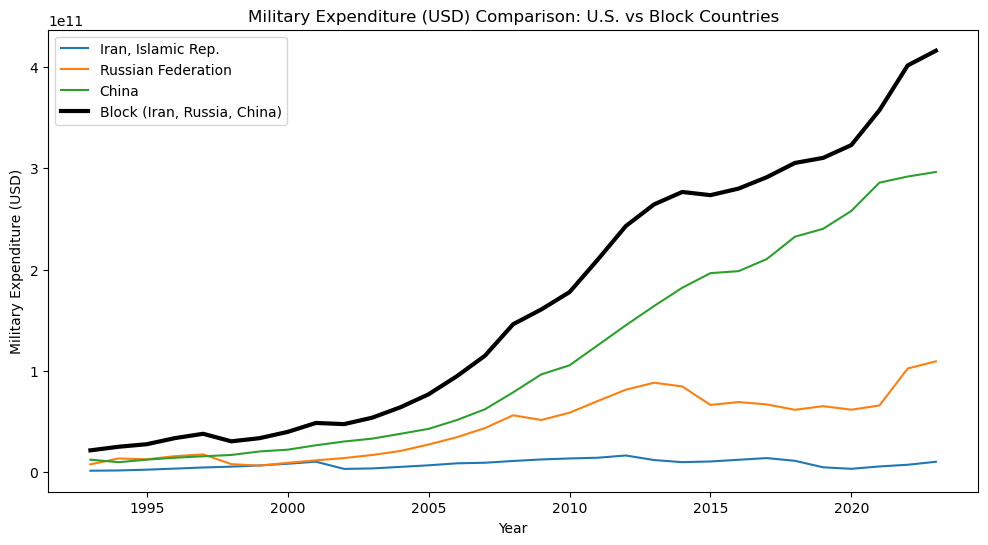

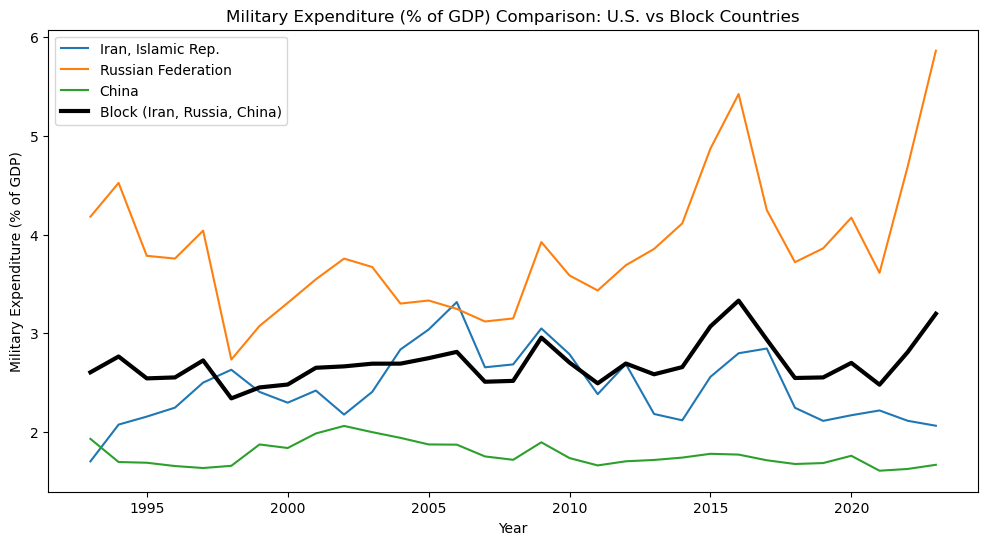

In [72]:
import matplotlib.pyplot as plt

# Filter the dataset to include the block and the individual countries for comparison
df_comparison = df[df['country'].isin(block_countries + ['United States'])]

# Plot the super country (block) and individual countries for comparison (USD)
plt.figure(figsize=(12, 6))
for country in block_countries:
    country_data = df_comparison[df_comparison['country'] == country]
    plt.plot(country_data['year'], country_data['mil_usd'], label=country)
plt.plot(block_aggregated['year'], block_aggregated['mil_usd'], label='Block (Iran, Russia, China)', color='black', linewidth=3)

plt.title('Military Expenditure (USD) Comparison: U.S. vs Block Countries')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (USD)')
plt.legend()
plt.show()

# Plot the super country (block) and individual countries for comparison (% of GDP)
plt.figure(figsize=(12, 6))
for country in block_countries:
    country_data = df_comparison[df_comparison['country'] == country]
    plt.plot(country_data['year'], country_data['mil_gdp_share'], label=country)
plt.plot(block_aggregated['year'], block_aggregated['mil_gdp_share'], label='Block (Iran, Russia, China)', color='black', linewidth=3)

plt.title('Military Expenditure (% of GDP) Comparison: U.S. vs Block Countries')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (% of GDP)')
plt.legend()
plt.show()

## USA against the block: Correlation

In [73]:
# Filter for U.S. data
df_usa = df[df['country'] == 'United States']

# Merge U.S. data with the aggregated block data on year
df_combined = pd.merge(df_usa[['year', 'mil_usd', 'mil_gdp_share']], block_aggregated, on='year', suffixes=('_USA', '_Block'))

# Calculate the correlation between U.S. and the Block for both USD and % of GDP
usd_corr = df_combined['mil_usd_USA'].corr(df_combined['mil_usd_Block'])
gdp_corr = df_combined['mil_gdp_share_USA'].corr(df_combined['mil_gdp_share_Block'])

print(f"Correlation between U.S. and Block (USD): {usd_corr:.2f}")
print(f"Correlation between U.S. and Block (% of GDP): {gdp_corr:.2f}")

Correlation between U.S. and Block (USD): 0.91
Correlation between U.S. and Block (% of GDP): -0.02


### Summary of Correlation Analysis

| **Title**                               | **Correlation Value** | **Interpretation**                                                                                         |
|-----------------------------------------|-----------------------|------------------------------------------------------------------------------------------------------------|
| **USA USD vs Russia USD**               | 0.93                  | **Very Strong Positive**: U.S. and Russia's defense spending in USD closely follow the same trends.         |
| **USA USD vs China USD**                | 0.87                  | **Strong Positive**: U.S. and China's defense spending in USD exhibit a significant positive relationship.   |
| **USA USD vs Iran USD**                 | 0.56                  | **Moderate Positive**: U.S. and Iran's military expenditure in USD are somewhat aligned, but less strongly.  |
| **Russia USD vs China USD**             | 0.89                  | **Very Strong Positive**: Russia and China have a very strong correlation in military spending in USD terms. |
| **USD Correlation (U.S. vs Block)**     | 0.91                  | **Very Strong Positive**: U.S. and the block (Iran, Russia, China) share similar trends in USD. |
| **USA USD vs Iran GDP**                 | 0.56                  | **Moderate Positive**: U.S. military spending in USD has some alignment with Iran's spending as a % of GDP.  |
| **USA USD vs China GDP**                | 0.07                  | **Very Weak Positive**: Little correlation between U.S. spending in USD and China's relative spending (% of GDP).|
| **USA USD vs Russia GDP**               | -0.17                 | **Weak Negative**: The relationship between U.S. defense spending in USD and Russia’s % of GDP is weakly negative.|
| **USA GDP vs Russia GDP**               | -0.17                 | **Weak Negative**: U.S. and Russia's military spending relative to GDP do not align strongly.                |
| **USA GDP vs China GDP**                | 0.07                  | **Very Weak Positive**: U.S. and China's military spending relative to GDP do not exhibit a significant relationship.|
| **USA GDP vs Iran GDP**                 | 0.25                  | **Weak Positive**: Some mild positive alignment between U.S. military spending as % of GDP and Iran's spending.|
| **GDP Correlation (U.S. vs Block)**     | -0.02                 | **Very Weak**: The correlation between U.S. military expenditure as % of GDP and the block (Iran, North Korea, Russia, China) is almost zero.|
| **U.S. vs Super Country Block (USD)**   | 0.91                  | **Very Strong Positive**: The overall defense spending (USD) of the super country block (Iran, North Korea, Russia, China) is highly correlated with the U.S.|
| **U.S. vs Super Country Block (GDP)**   | -0.02                 | **Very Weak**: The relative defense spending (as % of GDP) of the super country block has almost no correlation with the U.S.|

### Dropping the variable " Percentage of GDP " since no significant relevance has been seen 

In [74]:
# Drop the 'mil_gdp_share' column
df = df.drop(columns=['mil_gdp_share'])

# Verify the columns after dropping
print(df.columns)

Index(['country', 'year', 'mil_usd', 'log_mil_usd'], dtype='object')


## Checking for Stationarity

In [75]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
        
# Check stationarity for USD (mil_usd)
adf_test(df[df['country'] == 'United States']['mil_usd'])

ADF Statistic: -0.4451122612368298
p-value: 0.902289817562552
Critical Values: {'1%': np.float64(-3.7883858816542486), '5%': np.float64(-3.013097747543462), '10%': np.float64(-2.6463967573696143)}


Since the p-value is greater than 0.05 (0.902), we fail to reject the null hypothesis, meaning the time series is not stationary. This indicates that the mean, variance, or autocovariance of the data changes over time, and we’ll need to make the data stationary before proceeding with any modeling.

### Differencing to Make the Data Stationary

In [76]:
# Differencing the 'mil_usd' column to make it stationary
df['mil_usd_diff'] = df.groupby('country')['mil_usd'].diff()

# Check stationarity for the differenced data (USD)
adf_test(df[df['country'] == 'United States']['mil_usd_diff'].dropna())

ADF Statistic: -1.5135783330771735
p-value: 0.526783957953785
Critical Values: {'1%': np.float64(-3.8092091249999998), '5%': np.float64(-3.0216450000000004), '10%': np.float64(-2.6507125)}


The differenced series is still not stationary, as the p-value (0.526) is still greater than 0.05

### Second Order Differencing

In [77]:
# Apply second-order differencing (difference of the differenced data)
df['mil_usd_diff2'] = df.groupby('country')['mil_usd_diff'].diff()

# Check stationarity for the second differenced data (USD)
adf_test(df[df['country'] == 'United States']['mil_usd_diff2'].dropna())

ADF Statistic: -4.119620255031038
p-value: 0.0008986743912059141
Critical Values: {'1%': np.float64(-3.6889256286443146), '5%': np.float64(-2.9719894897959187), '10%': np.float64(-2.6252957653061224)}


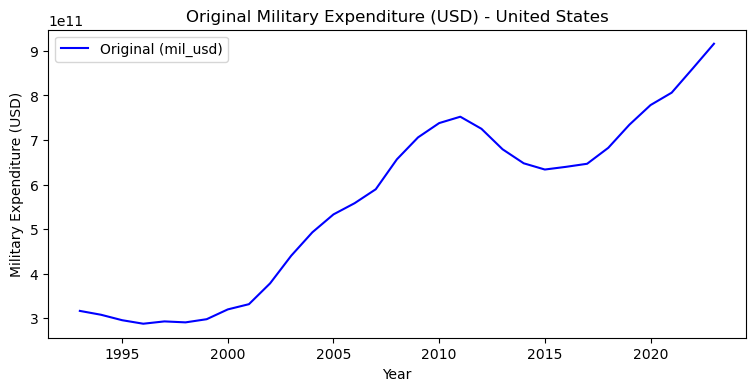

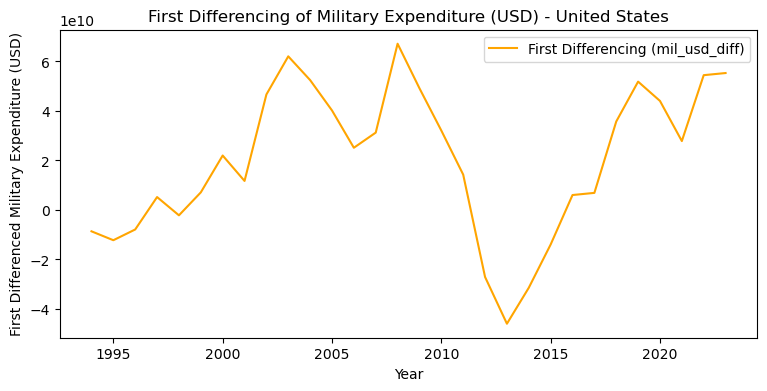

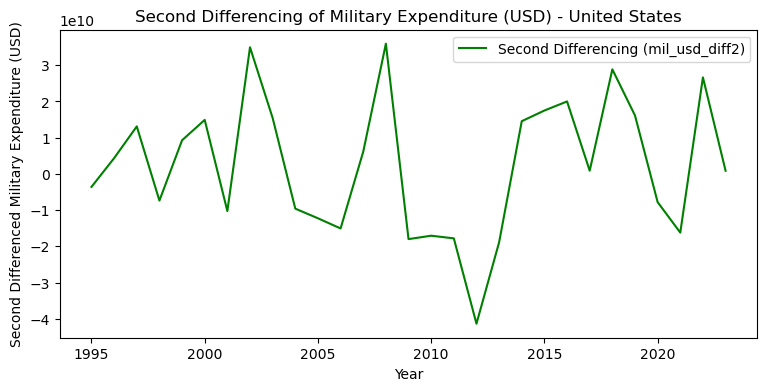

In [78]:
import matplotlib.pyplot as plt

# Filter data for U.S.
usa_data = df[df['country'] == 'United States']

# Plot Original Data (mil_usd)
plt.figure(figsize=(9, 4))
plt.plot(usa_data['year'], usa_data['mil_usd'], label='Original (mil_usd)', color='blue')
plt.title('Original Military Expenditure (USD) - United States')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (USD)')
plt.legend()
plt.show()

# Plot First Differencing (mil_usd_diff)
plt.figure(figsize=(9, 4))
plt.plot(usa_data['year'], usa_data['mil_usd_diff'], label='First Differencing (mil_usd_diff)', color='orange')
plt.title('First Differencing of Military Expenditure (USD) - United States')
plt.xlabel('Year')
plt.ylabel('First Differenced Military Expenditure (USD)')
plt.legend()
plt.show()

# Plot Second Differencing (mil_usd_diff2)
plt.figure(figsize=(9, 4))
plt.plot(usa_data['year'], usa_data['mil_usd_diff2'], label='Second Differencing (mil_usd_diff2)', color='green')
plt.title('Second Differencing of Military Expenditure (USD) - United States')
plt.xlabel('Year')
plt.ylabel('Second Differenced Military Expenditure (USD)')
plt.legend()
plt.show()

In [81]:
# Filter the dataset for China, Russia, and USA
df_filtered = df[df['country'].isin(['China', 'Russian Federation', 'United States'])]



'Ready_For_MODEL_defense_spending.csv'

In [82]:
filtered_data_path

'Ready_For_MODEL_defense_spending.csv'

In [83]:
df_filtered

,country,year,mil_usd,log_mil_usd,mil_usd_diff,mil_usd_diff2
1,China,1993,1.236023e+10,23.237750,NaN,NaN
10,Russian Federation,1993,7.766720e+09,22.773114,NaN,NaN
13,United States,1993,3.167194e+11,26.481282,NaN,NaN
15,China,1994,9.867120e+09,23.012474,-2.493106e+09,NaN
24,Russian Federation,1994,1.354787e+10,23.329495,5.781152e+09,NaN
...,...,...,...,...,...,...
416,Russian Federation,2022,1.023666e+11,25.351827,3.645893e+10,3.226376e+10
419,United States,2022,8.606922e+11,27.481003,5.446200e+10,2.662900e+10
421,China,2023,2.964386e+11,26.415106,4.480136e+09,-1.547775e+09
430,Russian Federation,2023,1.094544e+11,25.418774,7.087751e+09,-2.937118e+10


In [84]:
# Check for missing values
missing_values = df_filtered.isnull().sum()

# Check for duplicate rows
duplicates = df_filtered.duplicated().sum()

# Check for consistent time periods (continuous years for each country)
consistent_years = df_filtered.groupby('country')['year'].nunique()

missing_values, duplicates, consistent_years

(country          0
 year             0
 mil_usd          0
 log_mil_usd      0
 mil_usd_diff     3
 mil_usd_diff2    6
 dtype: int64,
 np.int64(0),
 country
 China                 31
 Russian Federation    31
 United States         31
 Name: year, dtype: int64)

In [85]:
# Drop rows with missing values in the differenced columns
df_filtered_cleaned = df_filtered.dropna(subset=['mil_usd_diff', 'mil_usd_diff2'])

# Verify the cleaned data for missing values
print(df_filtered_cleaned.isnull().sum())  # Check if there are any remaining missing values

country          0
year             0
mil_usd          0
log_mil_usd      0
mil_usd_diff     0
mil_usd_diff2    0
dtype: int64


In [86]:
df_filtered_cleaned

,country,year,mil_usd,log_mil_usd,mil_usd_diff,mil_usd_diff2
29,China,1995,1.238513e+10,23.239762,2.518009e+09,5.011115e+09
38,Russian Federation,1995,1.274163e+10,23.268140,-8.062423e+08,-6.587394e+09
41,United States,1995,2.958531e+11,26.413129,-1.223090e+10,-3.595459e+09
43,China,1996,1.427540e+10,23.381804,1.890271e+09,-6.277381e+08
52,Russian Federation,1996,1.582634e+10,23.484942,3.084711e+09,3.890953e+09
...,...,...,...,...,...,...
416,Russian Federation,2022,1.023666e+11,25.351827,3.645893e+10,3.226376e+10
419,United States,2022,8.606922e+11,27.481003,5.446200e+10,2.662900e+10
421,China,2023,2.964386e+11,26.415106,4.480136e+09,-1.547775e+09
430,Russian Federation,2023,1.094544e+11,25.418774,7.087751e+09,-2.937118e+10


In [87]:
# Save the filtered data to a new CSV file
filtered_data_path = 'Ready_For_MODEL_defense_spending.csv'
df_filtered.to_csv(filtered_data_path, index=False)

filtered_data_path  # return the file path so user can access it

'Ready_For_MODEL_defense_spending.csv'